Available columns in dataset: ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']
Shape of X (features): (1599, 11)
Shape of y (output): (1599,)


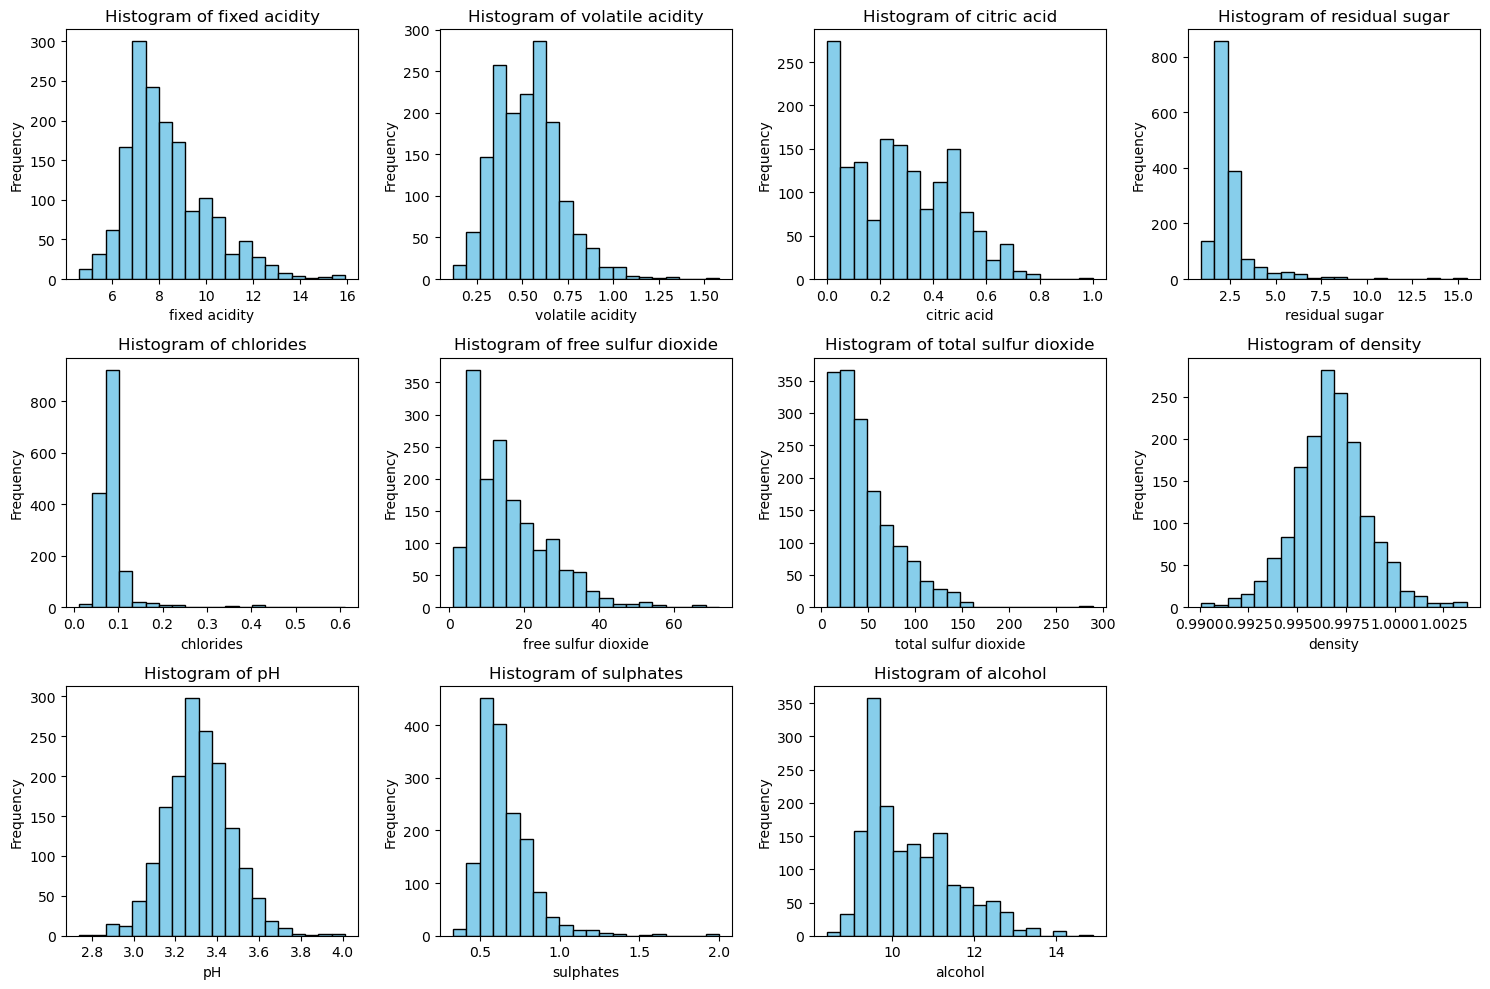

MLP Regressor Test RMSE: 0.62


C:\Users\psh006\AppData\Local\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


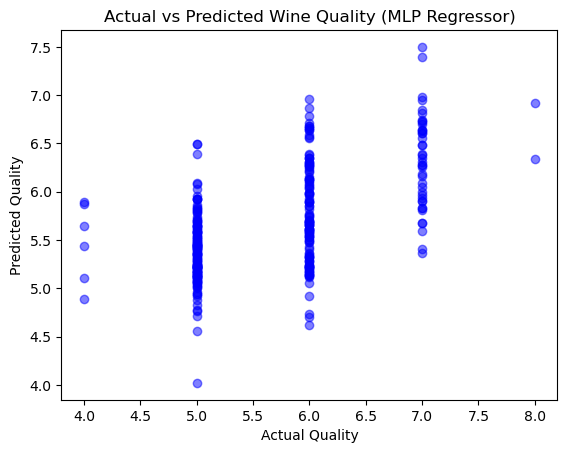

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error

# Load dataset # Source of dataset https://github.com/dsrscientist/dataset1
df = pd.read_csv("winequality-red.csv")
# Print column names to check for mismatches
print("Available columns in dataset:", df.columns.tolist())

# Select relevant numerical features
features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
            'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
            'pH', 'sulphates', 'alcohol']
target = 'quality'

# Split data into features and target variable
X = df[features].values
y = df[target].values  # No need to reshape as y is 1D
        
print(f"Shape of X (features): {X.shape}")
print(f"Shape of y (output): {y.shape}")

# Plot histograms for each feature
plt.figure(figsize=(15, 10))

for i, feature in enumerate(features, 1):
    plt.subplot(3, 4, i)  # 3 rows and 4 columns of subplots
    plt.hist(df[feature], bins=20, color='skyblue', edgecolor='black')
    plt.title(f"Histogram of {feature}")
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()



# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=22)

# Standardize features (important for neural networks)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize and fit the MLP Regressor model
mlp_model = MLPRegressor(activation='relu',
    hidden_layer_sizes=(256, 128),solver = 'sgd',
                learning_rate = 'adaptive', alpha=0.001, random_state=25)
mlp_model.fit(X_train, y_train)

# Predict using the trained model
y_pred_mlp = mlp_model.predict(X_test)

# Evaluate the model using RMSE (Root Mean Squared Error)
rmse_mlp = np.sqrt(mean_squared_error(y_test, y_pred_mlp))
print(f"MLP Regressor Test RMSE: {rmse_mlp:.2f}")

# Scatter plot: Actual vs Predicted Wine Quality
plt.scatter(y_test, y_pred_mlp, alpha=0.5, color="blue")
plt.xlabel("Actual Quality")
plt.ylabel("Predicted Quality")
plt.title("Actual vs Predicted Wine Quality (MLP Regressor)")
plt.grid
plt.show()
